In [2]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [40]:
# importing the dataset
df = pd.read_csv('Automobile_insurance_fraud.csv')
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [5]:
# checking for null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
#checking the data types
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
#Statistical description of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [8]:
df.describe(include=object).T

,count,unique,top,freq
policy_bind_date,1000,951,01-01-2006,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,02-02-2015,28
incident_type,1000,4,Multi-vehicle Collision,419


N    753
Y    247
Name: fraud_reported, dtype: int64


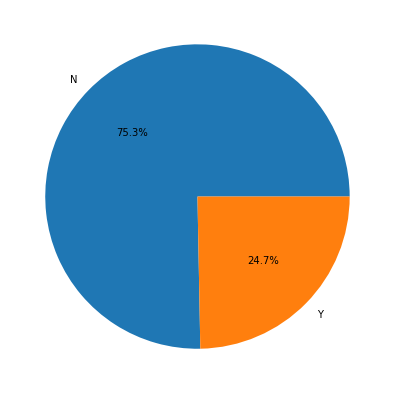

In [9]:
# Let's take a look at the target variable
fig = plt.figure(figsize =(10, 7))
plt.pie(df['fraud_reported'].value_counts(), labels = ['N', 'Y'], autopct='%1.1f%%')
print(df['fraud_reported'].value_counts())
plt.show()

38.948


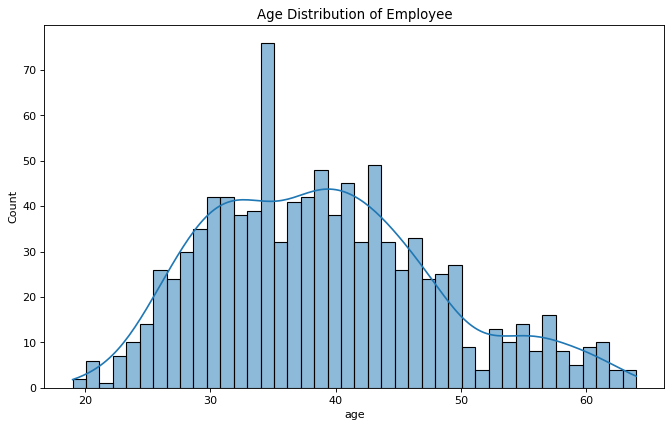

In [9]:
# Let's take a look at Age
plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='age', bins=42, kde=True).set_title('Age Distribution of Employee')
print(df['age'].mean())

In [12]:
def bar_chart(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

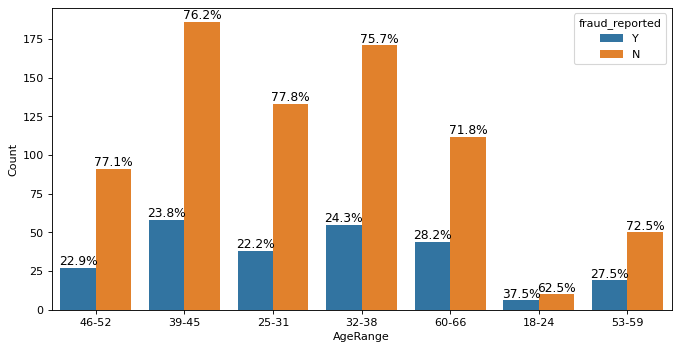

In [11]:
agerange = []
for age in df["age"]:
    if age >= 18 and age < 24:
        agerange.append("18-24")
    elif age >= 25 and age < 31:
        agerange.append("25-31")
    elif age >= 32 and age < 38:
        agerange.append("32-38")
    elif age >= 39 and age < 45:
        agerange.append("39-45")
    elif age >= 46 and age < 52:
        agerange.append("46-52")
    elif age >= 53 and age < 59:
        agerange.append("53-59")
    else:
        agerange.append("60-66")

df1 = df.copy()       
df1["AgeRange"] = agerange
plt.figure(figsize=(10,5), dpi=80)
age_range = sns.countplot(x="AgeRange", hue="fraud_reported", data=df1)
age_range.set(xlabel='AgeRange', ylabel='Count')

bar_chart(age_range)
plt.show()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


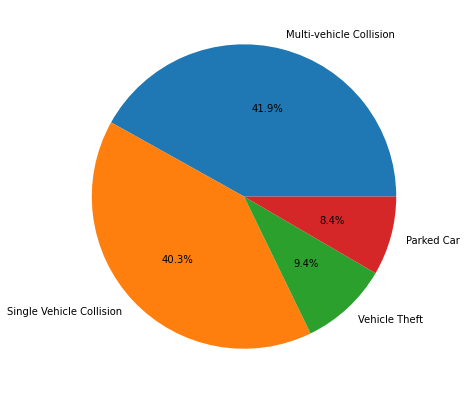

In [15]:
# Let's take a lonnk at the type of incident and see which of them tend to be more fraudulent
fig = plt.figure(figsize =(7, 7))
label = df['incident_type'].value_counts().keys()
plt.pie(df['incident_type'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['incident_type'].value_counts())
plt.show()

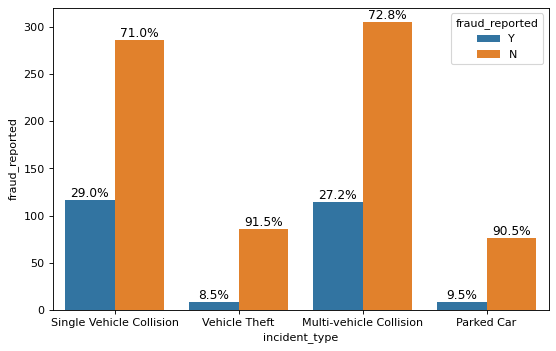

In [16]:
# let's see how incident types are related to fraud
plt.figure(figsize=(8,5), dpi=80)
gender = sns.countplot(x="incident_type", hue="fraud_reported", data=df)
gender.set(xlabel='incident_type', ylabel='fraud_reported')

bar_chart(gender)
plt.show()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


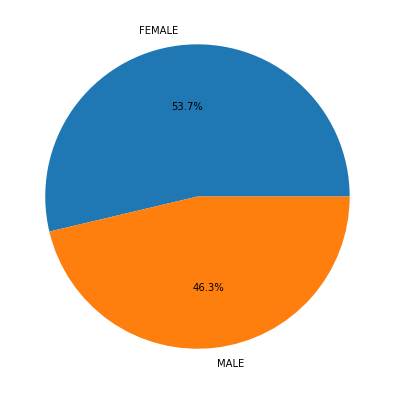

In [18]:
# Lets take a look at the gender column
fig = plt.figure(figsize =(10, 7))
label = df['insured_sex'].value_counts().keys()
plt.pie(df['insured_sex'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['insured_sex'].value_counts())
plt.show()

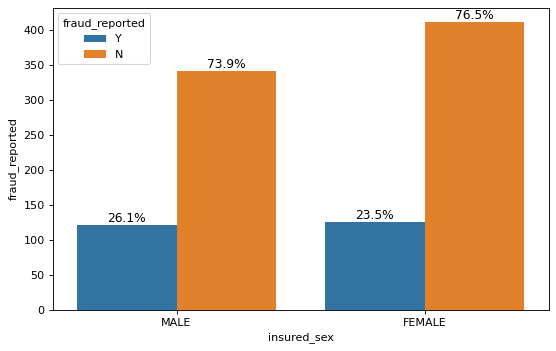

In [19]:
#let's see if gender affects Churn
plt.figure(figsize=(8,5), dpi=80)
gender = sns.countplot(x="insured_sex", hue="fraud_reported", data=df)
gender.set(xlabel='insured_sex', ylabel='fraud_reported')

bar_chart(gender)
plt.show()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


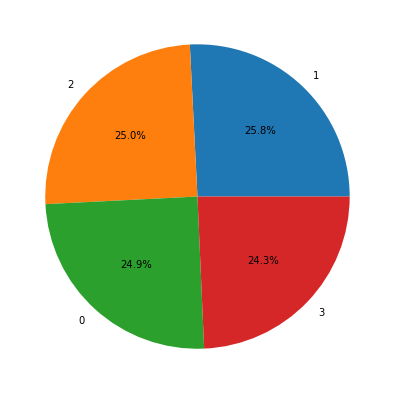

In [10]:
# Lets take a look at the gender column
fig = plt.figure(figsize =(10, 7))
label = df['witnesses'].value_counts().keys()
plt.pie(df['witnesses'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['witnesses'].value_counts())
plt.show()

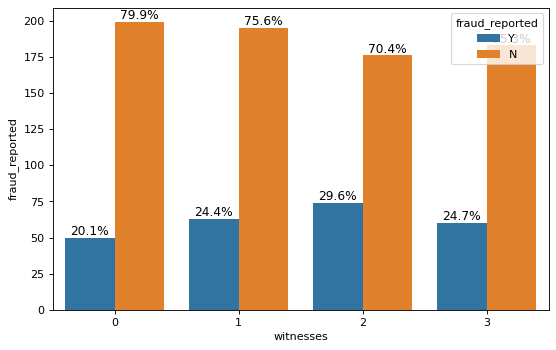

In [15]:
#let's see if gender affects Churn
plt.figure(figsize=(8,5), dpi=80)
witness = sns.countplot(x="witnesses", hue="fraud_reported", data=df)
witness.set(xlabel='witnesses', ylabel='fraud_reported')

bar_chart(witness)
plt.show()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


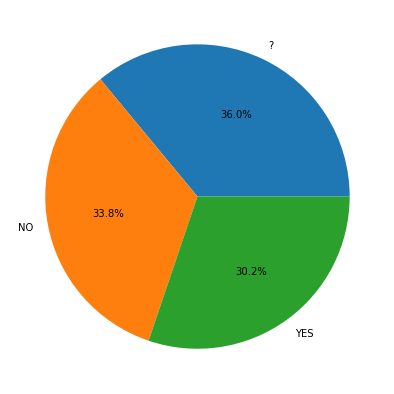

In [16]:
# Lets take a look at the gender column
fig = plt.figure(figsize =(10, 7))
label = df['property_damage'].value_counts().keys()
plt.pie(df['property_damage'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['property_damage'].value_counts())
plt.show()

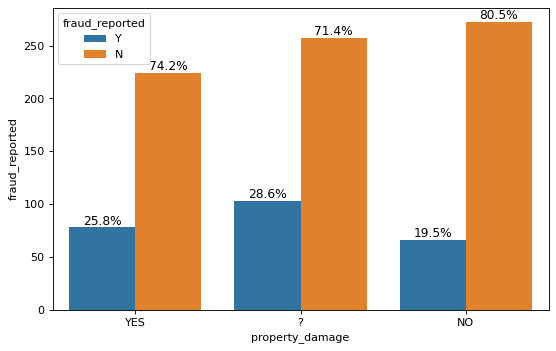

In [17]:
#let's see if gender affects Churn
plt.figure(figsize=(8,5), dpi=80)
propert = sns.countplot(x="property_damage", hue="fraud_reported", data=df)
propert.set(xlabel='property_damage', ylabel='fraud_reported')

bar_chart(propert)
plt.show()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


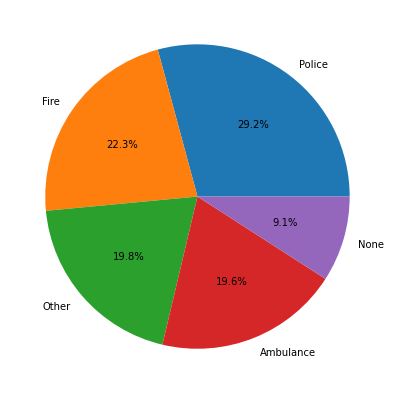

In [18]:
# Lets take a look at the gender column
fig = plt.figure(figsize =(10, 7))
label = df['authorities_contacted'].value_counts().keys()
plt.pie(df['authorities_contacted'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['authorities_contacted'].value_counts())
plt.show()

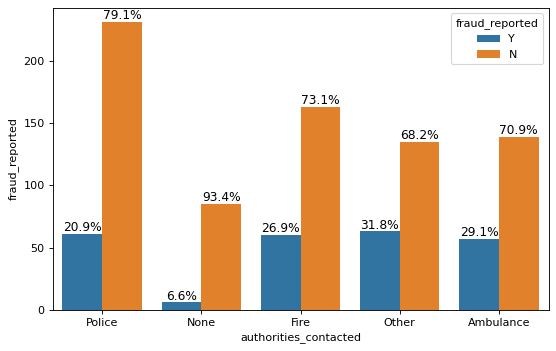

In [19]:
#let's see if gender affects Churn
plt.figure(figsize=(8,5), dpi=80)
authorities = sns.countplot(x="authorities_contacted", hue="fraud_reported", data=df)
authorities.set(xlabel='authorities_contacted', ylabel='fraud_reported')

bar_chart(authorities)
plt.show()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


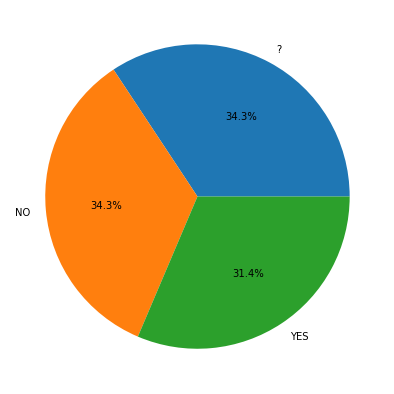

In [20]:
# Lets take a look at the gender column
fig = plt.figure(figsize =(10, 7))
label = df['police_report_available'].value_counts().keys()
plt.pie(df['police_report_available'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['police_report_available'].value_counts())
plt.show()

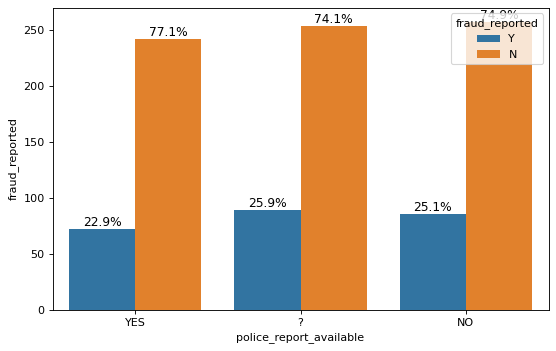

In [21]:
#let's see if gender affects Churn
plt.figure(figsize=(8,5), dpi=80)
police_report = sns.countplot(x="police_report_available", hue="fraud_reported", data=df)
police_report.set(xlabel='police_report_available', ylabel='fraud_reported')

bar_chart(police_report)
plt.show()

17    54
3     53
0     52
23    51
16    49
4     46
10    46
13    46
6     44
14    43
9     43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


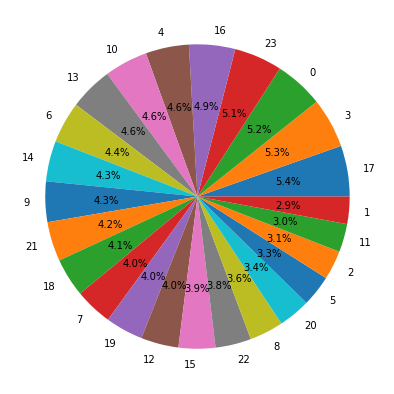

In [22]:
# Lets take a look at the gender column
fig = plt.figure(figsize =(10, 7))
label = df['incident_hour_of_the_day'].value_counts().keys()
plt.pie(df['incident_hour_of_the_day'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['incident_hour_of_the_day'].value_counts())
plt.show()

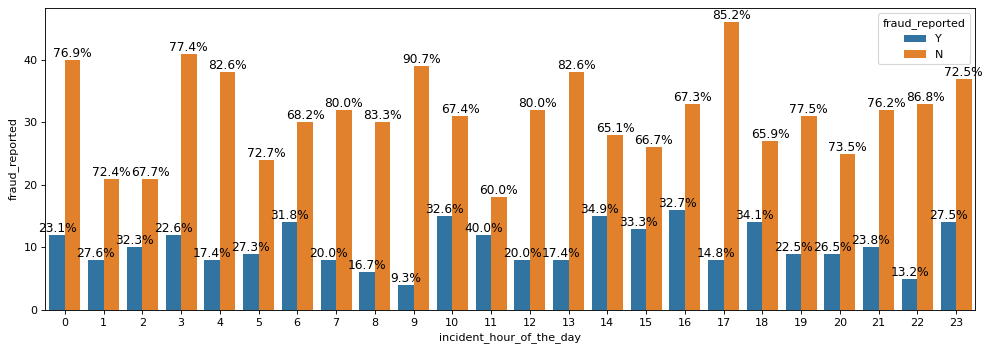

In [24]:
#let's see if gender affects Churn
plt.figure(figsize=(15,5), dpi=80)
hour_of_the_day = sns.countplot(x="incident_hour_of_the_day", hue="fraud_reported", data=df)
hour_of_the_day.set(xlabel='incident_hour_of_the_day', ylabel='fraud_reported')

bar_chart(hour_of_the_day)
plt.show()

In [41]:
# separating the categorical columns
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
categorical_col

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [42]:
# encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,71610,6510,13020,52080,10,1,2004,1,NaN
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,2007,1,NaN
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,1,34650,7700,3850,23100,4,30,2007,0,NaN
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,63400,6340,6340,50720,3,34,2014,1,NaN
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,6500,1300,650,4550,0,31,2009,0,NaN
5,256,39,104594,385,2,1,1000,1351.10,0,478456,...,1,64100,6410,6410,51280,10,3,2003,1,NaN
6,137,34,413978,112,1,1,1000,1333.35,0,441716,...,0,78650,21450,7150,50050,9,29,2012,0,NaN
7,165,37,429027,60,0,0,1000,1137.03,0,603195,...,2,51590,9380,9380,32830,1,5,2015,0,NaN
8,27,33,485665,132,0,0,500,1442.99,0,601734,...,2,27700,2770,2770,22160,12,9,2012,0,NaN
9,212,42,636550,772,0,0,500,1315.68,0,600983,...,0,42300,4700,4700,32900,10,1,1996,0,NaN


In [43]:
# dropping non useful columns
df.drop(['policy_number','_c39'], axis="columns", inplace=True)

In [47]:
df['policy_annual_premium'] = df['policy_annual_premium'].astype(int)

In [50]:
# Now we will split the data into testing and training sets
x = df.drop('fraud_reported', axis=1)
y = df.fraud_reported
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [51]:
# Now we will scale the data to remove variances
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test= pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
x_train.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.955207,1.638962,-1.343274,0.012090,-1.188172,1.391087,1.046912,-0.478257,-0.690736,1.071093,...,0.015577,-1.308869,-1.190891,0.878133,1.067368,-0.216052,1.012743,0.607371,1.405126,0.695588
1,-1.769636,-0.759595,0.270324,1.221053,1.317010,-0.233201,0.511457,-0.478257,-0.855351,1.071093,...,0.015577,-0.415007,0.049620,-0.489885,-0.171141,-0.167134,-0.601086,-1.616009,0.325940,-0.495321
2,-1.360600,-0.214468,0.021801,0.012090,0.064419,1.391087,-0.053053,-0.478257,-1.009237,1.071093,...,0.015577,-1.308869,0.049620,-1.716051,-1.371325,-1.379878,-1.702705,0.113286,1.495058,1.035847
3,0.693286,0.984810,-1.354079,1.221053,1.317010,-0.233201,0.914086,-0.478257,-0.781654,-0.933626,...,1.227130,1.372716,0.049620,-1.721250,-1.341068,-1.349305,-1.725655,1.595540,0.056143,-0.325191
4,1.215460,0.984810,-1.372088,0.012090,0.064419,-1.045346,0.818617,0.839775,-0.417312,1.071093,...,1.227130,1.372716,0.049620,0.451463,-0.048097,1.430834,0.280417,0.360329,-1.112975,-0.325191


In [52]:
# let's check for skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004471
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584


In [53]:
# lets use vif to check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]
  
print(vif_data)

                        feature       VIF
0            months_as_customer  6.495584
1                           age  6.516179
2              policy_bind_date  1.048061
3                  policy_state  1.048652
4                    policy_csl  1.042278
5             policy_deductable  1.053338
6         policy_annual_premium  1.051580
7                umbrella_limit  1.043548
8                   insured_zip  1.045992
9                   insured_sex  1.065663
10      insured_education_level  1.058378
11           insured_occupation  1.040480
12              insured_hobbies  1.059122
13         insured_relationship  1.077357
14                capital-gains  1.059644
15                 capital-loss  1.056372
16                incident_date  1.041039
17                incident_type  5.148093
18               collision_type  1.736736
19            incident_severity  1.225553
20        authorities_contacted  1.089298
21               incident_state  1.062565
22                incident_city  1

In [54]:
#Creating a function within many Machine Learning Models
def models(x_train,y_train):
  
    #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(x_train, y_train)

    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(x_train,y_train)

    #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(x_train, y_train)

    #Using XGBoost Algorithm
    from sklearn.ensemble import AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(x_train, y_train)

    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(x_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(x_train, y_train)

    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Ada Boost Training Accuracy:', ada.score(x_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, ada, tree, forest

In [55]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.7942857142857143
[1]K Nearest Neighbor Training Accuracy: 0.79
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7928571428571428
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8628571428571429
[4]Ada Boost Training Accuracy: 0.8928571428571429
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9885714285714285


In [56]:
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()

[[211  15]
 [ 44  30]]
Model[0] Testing Accuracy = "0.8033333333333333 !"

[[214  12]
 [ 65   9]]
Model[1] Testing Accuracy = "0.7433333333333333 !"

[[207  19]
 [ 44  30]]
Model[2] Testing Accuracy = "0.79 !"

[[226   0]
 [ 72   2]]
Model[3] Testing Accuracy = "0.76 !"

[[209  17]
 [ 42  32]]
Model[4] Testing Accuracy = "0.8033333333333333 !"

[[198  28]
 [ 34  40]]
Model[5] Testing Accuracy = "0.7933333333333333 !"

[[215  11]
 [ 59  15]]
Model[6] Testing Accuracy = "0.7666666666666667 !"



In [58]:
# Regularization Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
parameters = {'fit_intercept':[True,False],
             'intercept_scaling':list(range(1,10)),
             'penalty':['l1', 'l2', 'elasticnet', 'none']}
lr = LogisticRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'intercept_scaling': 1, 'penalty': 'none'}


In [59]:
lr = LogisticRegression(fit_intercept:='l2', intercept_scaling=1)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_dec = lr.predict(x_test)

lrs = accuracy_score(y_test, pred_dec)
print(lrs*100)

lrscore = cross_val_score(lr,x,y,cv=5)
lrc = lrscore.mean()
print(lrc*100)

80.33333333333333
75.2


In [60]:
# Regularization Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
             'n_estimators':list(range(10,100)),
             'max_features':['sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 27}


In [61]:
rf = RandomForestClassifier(criterion='gini',max_features='log2', n_estimators=27)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)

rfs = accuracy_score(y_test, pred_dec)
print(rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print(rfc*100)

75.33333333333333
76.30000000000001


In [62]:
# Regularization Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
parameters = {'learning_rate':[0.001,0.01,0.1,1.0,10],
             'n_estimators':[0.001,0.01, 0.1,1.0,10],
             'random_state':list(range(1,100))}
ab = AdaBoostClassifier()
clf = GridSearchCV(ab,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.001, 'n_estimators': 10, 'random_state': 1}


In [63]:
ab = AdaBoostClassifier(learning_rate=0.001,random_state=1,n_estimators=10)
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
pred_dec = ab.predict(x_test)

absc = accuracy_score(y_test, pred_dec)
print(absc*100)

abscore = cross_val_score(ab,x,y,cv=5)
abc = abscore.mean()
print(abc*100)

82.0
81.1


In [65]:
# Regularization Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
parameters = {'splitter':['best', 'random'],
             'min_samples_split':list(range(1,10)),
             'criterion':['gini', 'entropy', 'log_loss']}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'min_samples_split': 5, 'splitter': 'best'}


In [66]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=5, splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dec = dt.predict(x_test)

dtsc = accuracy_score(y_test, pred_dec)
print(dtsc*100)

dtscore = cross_val_score(dt,x,y,cv=5)
dtc = dtscore.mean()
print(dtc*100)

81.0
78.1


In [67]:
# Regularization Support Vector Machine
from sklearn.svm import SVC

parameters = {'random_state': list(range(1,100)),
             'kernel':['poly', 'rbf', 'sigmoid'],
             'gamma':['scale', 'auto']}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'poly', 'random_state': 1}


In [68]:
svc = SVC(gamma='scale', kernel='poly', random_state=1)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_dec = svc.predict(x_test)

svsc = accuracy_score(y_test, pred_dec)
print(svsc*100)

svscore = cross_val_score(svc,x,y,cv=5)
svs = svscore.mean()
print(svs*100)

75.33333333333333
75.29999999999998


In [69]:
# Regularization K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
parameters = {'weights':['uniform', 'distance'],
             'n_neighbors':list(range(1,10)),
             'algorithm':['auto', 'ball_tree', 'kd_tree','brute']}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}


In [70]:
knn = KNeighborsClassifier(algorithm='auto',n_neighbors=8, weights='uniform')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_dec = dt.predict(x_test)

knnc = accuracy_score(y_test, pred_dec)
print(knnc*100)

knnscore = cross_val_score(knn,x,y,cv=5)
knc = knnscore.mean()
print(knc*100)

81.0
74.1


In [71]:
# saving the best model
import pickle
pickle.dump(svc, open('insfraud.pkl','wb'))